# Machine Learning's "Hello World"!

> Indented block



This is the computer assignment **#3** of the **Artificial Intelligence** undergraduate course at **Shahid Beheshti University**.

In this notebook, we explore the basic and traditional machine learning algorithms and see how to implement predicative models powered by [Sickit-Learn](https://scikit-learn.org/stable/) library.

 
 **Before you start:** Please read the ***Submission*** section at the bottom of the notebook carefully.

In [78]:
#here we import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing datasets and images from my own google drive folders

In [79]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML


# 1. Medical Insurance Cost Prediction

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost:

- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight using the ratio of height to weight, ideally 18.5 to 24.9
- **smoker**: Smoking
- **children**: Number of children covered by health insurance / Number of dependents

In [80]:
df = pd.read_csv('datasets/insurance.csv')
print("Shape of the dataset: {}".format(df.shape))
df.head(5)

Shape of the dataset: (1338, 6)


,age,sex,bmi,children,smoker,charges
0,45,female,27.83,2,no,8515.7587
1,24,male,32.70,0,yes,34472.8410
2,34,female,29.26,3,no,6184.2994
3,64,male,34.50,0,no,13822.8030
4,27,female,24.10,0,no,2974.1260


There is a library named `pandas_profiling` in Python include a method named as `ProfileReport()` which generate a basic report on the input DataFrame. The report consist of the following:

- DataFrame overview,
- Each attribute on which DataFrame is defined,
- Correlations between attributes (Pearson Correlation and Spearman Correlation), and
- A sample of DataFrame.

By running the cell below, a HTML file will be created next to the notebook in the project directory.

In [82]:
#I couldn't install pandas-profiling it had some errors so I used a github link
!pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Preparing metadata (setup.py) ... done


In [83]:
# import pandas_profiling library
import pandas_profiling as pp

# forming ProfileReport and save
# as a HTML file
profile = pp.ProfileReport(df)
profile.to_file("insurance_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.1 Linear Regression

**Linear Regression** is a machine learning algorithm based on **supervised learning**. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
<img src="images/linear-regression.png" width=400 height=400 />

In this problem, we want to create a linear regression model for the existing dataest. For simplicity, we only consider one of the features of the data `bmi` and the target `charges`. Also we are just interested in the people who smokes. So:

Text(0, 0.5, 'charges')

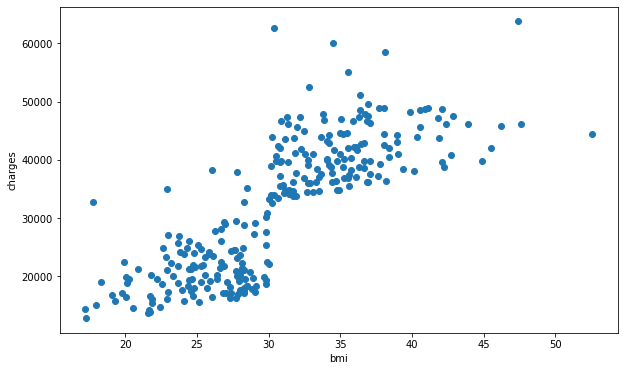

In [84]:
X = df[df['smoker'] =='yes']['bmi'].values  # X now is a numpy array
target = df[df['smoker'] =='yes']['charges'].values  # also target is a numpy array

# plot the points
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X, y = target)
plt.xlabel("bmi")
plt.ylabel("charges")

## Q1. Implement `SimpleLinearRegression` class. (20 points)

Fill the blank lines with the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


class SimpleLinearRegression():
    def __init__(self):
        self.intercept = 0.0
        self.coeff = 0.0
    
    def train(self, X_train, y_train):
        # TODO: Thin function takes X_train: numpy.ndarray and y : numpy.ndarray
        # and fit a linear line to the points with the least loss
        # Use sklearn.linear_model.LinearRegression for this purpose
        # At last this function must set the intercept and coefficient of the predicted line
        
        intercept = 0.0
        coeff = 0.0
        ############# Your code here ############
        #we use simple linear regression with just x and y axis
        #coeff means the slope of the line and intercept is the initial space from (0,0)
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X_train, y_train)
        coeff = reg.coef_
        intercept = reg.intercept_
        #########################################
        self.intercept = intercept
        self.coeff = coeff
        
        return coeff, intercept
    
    def compute_loss(self, y_pred, y_true, loss_fn = 'MSE'):
        # TODO: Implement this function that takes y_pred and y_true
        # as a 1-dimensional numpy array (n_samples,) and returns
        # the loss using sklearn.metrics functions
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']
        
        loss = None
        if loss_fn == 'MSE':
            ############# Your code here ############
            loss = mean_squared_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'MAE':
            ############# Your code here ############
            loss = mean_absolute_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'R2_Score':
            ############# Your code here ############
            loss = r2_score(y_true, y_pred)
            #########################################
        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return loss
        
    def normalize(self, X, normalization='Standardization'):
        # TODO: Implement this function that takes X : numpy.ndarray
        # as the input feature array and normalize it
        # You can use sklearn.preprocessing normalizations functions too.
        # NOTE: For test set, you must use the mean and std of train set (standardization)
        # of the train set. (since test set has not seen so far)
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        possible_normalization = ['Standardization', 'MinMaxScaling']
        if len(X.shape) < 2:
          X = X.reshape(-1,1)
        nomalaized_feat = None
        if normalization == 'Standardization':
            ############# Your code here ############
            nomalaized_feat = StandardScaler().fit_transform(X)
            #########################################
        elif normalization == 'MinMaxScaling':
            ############# Your code here ############
            nomalaized_feat = MinMaxScaler().fit_transform(X)
            #########################################
        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return nomalaized_feat
    
    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):   
        # TODO: Implement this function that takes X : numpy.ndarray and y : numpy.ndarray
        # and use sklearn.model_selection.train_test_split to split your data into test and train sets
        
        ############# Your code here ############
        from sklearn.model_selection import train_test_split
        #we use 20% of the data for testing and 80% for training as it said in the code
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
        #########################################
        
        return X_train, y_train, X_test, y_test

## Q2. What are the coefficient and intercept of the trained linear model? (5 points)

After completing the functions above, use them to report the final coefficient and intercept of the predicted model.

**Note**: When implementing the `SimpleLinearRegression` class, notice that before training your model, normalize your input features for better convergence by completeing `normalize()` function. If you forget it, it may hurts your model consequently!

In [86]:
slr = SimpleLinearRegression()
############# Your code here ############
X_train, y_train, X_test, y_test = slr.prepare_dataset(X, target)
X_normal = slr.normalize(X_train)
coeff, intercept = slr.train(X_normal, y_train)
print(f'coefficient = {coeff}')
print(f'intercept = {intercept}')
#########################################

coefficient = [9339.09746889]
intercept = 32001.6709019178


## Q3. Plot the prediceted line and the data points. (5 points)

- Use `plt.scatter` to indicate the data points (Blue points for Train set and Red points for Test set).
- Plot the predicted line using the coefficient and intercept calculated in the previous question. (`plt.plot`)

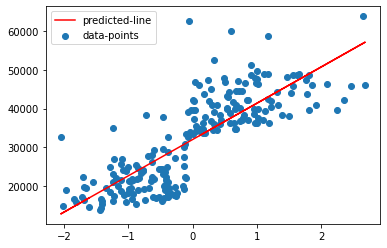

In [87]:
############# Your code here ############
plt.scatter(X_normal, y_train, label = 'data-points')
plt.plot(X_normal, coeff*X_normal + intercept,  color = 'red', label = 'predicted-line')
plt.legend()
#########################################

## Q4. Compute loss. (5 points)

First you must search about the following loss functions and compare them. (By showing their benefits to each other).

- **MSE**: Mean Squared Error
- **MAE**: Mean Absolute Error
- **R2-score**

Then create a DataFrame similar to the table shown below:

| loss_function | train_set | test_set | 
| --- | --- | --- |
| MSE | ... | ... |
| MAE | ... | ... |
| R2-score | ... | ... |

In [88]:
############# Your code here ############
loss_fns = ['MSE', 'MAE', 'R2_Score']
sets = ['train_set', 'test_set']
loss_df = pd.DataFrame(index=loss_fns, columns = sets)
#training code:
y_pred = coeff*X_normal + intercept
for fn in loss_fns:
  loss = slr.compute_loss(y_train, y_pred, loss_fn = fn)
  loss_df['train_set'][fn] = loss
#testing code:
X_normal_test = slr.normalize(X_test, normalization='MinMaxScaling')
y_pred = coeff*X_normal_test + intercept
for fn in loss_fns:
  loss = slr.compute_loss(y_test, y_pred, loss_fn = fn)
  loss_df['test_set'][fn] = loss
#our job was to calculate the loss
display(loss_df)
#########################################

,train_set,test_set
MSE,45788820.509764,115115744.179783
MAE,5146.868721,8806.966979
R2_Score,0.475012,-40.026086


## 1.2 Underfitting & Overfitting Issues

A model is said to be a good machine learning model if it generalizes any new input data from the problem domain in a proper way. This helps us to make predictions in the future data, that the data model has never seen. Now, suppose we want to check how well our machine learning model learns and generalizes to the new data (Test set). For that, we have overfitting and underfitting, which are majorly responsible for the poor performances of the machine learning algorithms.

- **Underfitting:** A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm **does not fit the data well enough**. It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection. 

    Techniques to reduce underfitting: 

    1. Increase model complexity
    2. Increase the number of features, performing feature engineering
    3. Remove noise from the data.
    4. Increase the number of epochs or increase the duration of training to get better results.
    
    
- **Overfitting:** A statistical model is said to be overfitted when we train it with a lot of data (just like fitting ourselves in oversized pants!). When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. 

    Techniques to reduce overfitting: 

    1. Increase training data.
    2. Reduce model complexity.
    3. Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
    4. Ridge Regularization and Lasso Regularization
    
    In the image below you can see linear regression and polynomial regression models. In the linear model, the model has underfitted and thus it cannot be generalized on all the data point properly (Underfitting). So we can add polynomial features as well to increase the complexity of the model. Therefore, in the middle figure you can see better fittnes of the model on the data points by adding $\{x^2, x^3, x^4\}$ to our hypothesis space.
Although in the right side figure you see less loss than others, but the model is overfitted. It cannot be generalized on the test set (unseen data). 
    
<img src="images/underfitting_overfitting.png" width=700 height=700 />


**Note:** The image above is not related to the given `insurance.csv` dataset.

## Q5. Implement `PolynomialRegression` class. (15 points)

Fill the blank lines with using the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


class PolynomialRegression():
    def __init__(self, degree=3):
        self.degree = degree
    
    def train(self, X_train, y_train):
        # TODO: Thin function takes X_train: numpy.ndarray and y : numpy.ndarray
        # and fit a linear line to the points with the least loss
        # Use sklearn.linear_model.LinearRegression for this purpose
        # At last this function must set the intercept and coefficient of the predicted line
        
        intercept = None
        coeff = None
        ############# Your code here ############
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X_train, y_train)
        coeff = reg.coef_
        intercept = reg.intercept_
        #########################################
        
        return coeff, intercept
    
    def compute_loss(self, y_pred, y_true, loss_fn = 'MSE'):
        # TODO: Implement this function that takes y_pred and y_true
        # as a 1-dimensional numpy array (n_samples,) and returns
        # the loss using sklearn.metrics functions
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']
        
        loss = None
        if loss_fn == 'MSE':
            ############# Your code here ############
            loss = mean_squared_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'MAE':
            ############# Your code here ############
            loss = mean_absolute_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'R2_Score':
            ############# Your code here ############
            loss = r2_score(y_true, y_pred)
            #########################################
        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return loss
        
    def normalize(self, X, normalization='Standardization'):
        # TODO: Implement this function that takes X : numpy.ndarray
        # as the input feature array and normalize it
        # You can use sklearn.preprocessing normalizations functions too.
        # NOTE: For test set, you must use the mean and std of train set (standardization)
        # of the train set. (since test set has not seen so far)
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        possible_normalization = ['Standardization', 'MinMaxScaling']
        if len(X.shape) < 2:
          X = X.reshape(-1,1)
        nomalaized_feat = None
        if normalization == 'Standardization':
            ############# Your code here ############
            nomalaized_feat = StandardScaler().fit_transform(X)
            #########################################
        elif normalization == 'MinMaxScaling':
            ############# Your code here ############
            nomalaized_feat = MinMaxScaler().fit_transform(X)
            #########################################
        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return nomalaized_feat
    
    def generate_polynomial_features(self, X, degree):
        # TODO: Implement this function that takes degree: int and X: numpy.ndarray
        # to return polnomial features of those input features.
        # Use sklearn.preprocessing.PolynomialFeatures. Read its documentation for more info.
        from sklearn.preprocessing import PolynomialFeatures
        X_pol = None
        ############# Your code here ############
        if len(X.shape) < 2:
          X = X.reshape(-1,1)
        poly = PolynomialFeatures(degree)
        X_pol = poly.fit_transform(X)
        #########################################
        
        return X_pol
        

    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):   
        # TODO: Implement this function that takes X : numpy.ndarray and y : numpy.ndarray
        # and use sklearn.model_selection.train_test_split to split your data into test and train sets
        X_train, y_train, X_test, y_test = None, None, None, None
        ############# Your code here ############
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
        #########################################
        
        return X_train, y_train, X_test, y_test

## Q6. Find the best polynomial degree. (10 points)

The best polynomial degree is the one with the least loss for test set data points. So use the implemented `PolynomialRegression`above multiple times to find the best one. 

In [92]:
for degree in range(20):
    best_polynomial_degree = 1
    least_loss = 0.0
    pr = PolynomialRegression(degree=degree)
    ############# Your code here ############
    X_train, y_train, X_test, y_test = pr.prepare_dataset(X, target)
    
    X_normal_train = pr.normalize(X_train, normalization='MinMaxScaling')
    X_pol_train = pr.generate_polynomial_features(X_normal_train, degree)

    X_normal_test = pr.normalize(X_test, normalization='MinMaxScaling')
    X_pol_test = pr.generate_polynomial_features(X_normal_test, degree)
    
    coeff, intercept = pr.train(X_pol_train, y_train)
    
    y_pred = np.dot(X_pol_test, coeff) + intercept
    loss = pr.compute_loss(y_pred, y_test, loss_fn='MAE')
    if loss < least_loss:
      best_degree = degree
print(f'best polynomial degree = {best_polynomial_degree}')
    #########################################

best polynomial degree = 1


## Q7. Plot some experimental results (5 points)

Use `plt.subplot` to plot the predicted polynomial model **for degrees, 1, 4 and 20**.

So note that you must present 1 figure with 3 plots.

Also consider these:
- Set the title of each plot to ***Polynomial Fit degree i***
- Print loss of each model on both train and test set.

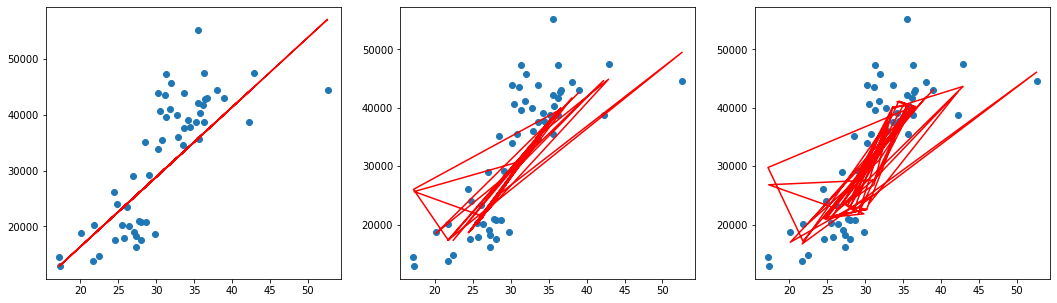

In [93]:
chosen_degrees = [1,4,20]
plt.figure(figsize= (18,5))
for i, degree in enumerate(chosen_degrees):
    pr = PolynomialRegression(degree=degree)
    X_train, y_train, X_test, y_test = pr.prepare_dataset(X, target)
    X_normal_train = pr.normalize(X_train, normalization='MinMaxScaling')
    X_pol_train = pr.generate_polynomial_features(X_normal_train, degree)
    X_normal_test = pr.normalize(X_test, normalization='MinMaxScaling')
    X_pol_test = pr.generate_polynomial_features(X_normal_test, degree)
    coeff, intercept = pr.train(X_pol_train, y_train)
    y_pred = np.dot(X_pol_test, coeff) + intercept
    plt.subplot(1,3,i+1)
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, c='r')
    #########################################

# 2. Sign Language Classification

The American Sign Language MNIST Dataset we are going to use is obtained from [Kaggle](https://www.kaggle.com/datamunge/sign-language-mnist). This dataset is much like the original MNIST dataset. Each training and test case consists of a numerical label (0–25) with a one-to-one correspondence to the English alphabet (0 corresponds to A) and a grayscale 28x28 pixel image with values ranging from 0–255. However, there is no label correspondence to the letter J (9) and Z (25) due to the motion required to symbolize those letters. The number of testing and training cases in this dataset are much lower compared to the orginal MNIST dataset since there are only 27,455 training cases and 7,172 tests cases in this dataset.

<img src="images/sign_language.png" width=700 height=700 />

In this problem we are going to implement a simple multi-class classification model to classify each image to its desired label. For downloading the dataset, use this [link](https://www.kaggle.com/datamunge/sign-language-mnist).

**Note:** You may need to create a new account in Kaggle if you have not registered yet. Then put the downloaded directory in the `dataset/` folder with the name of : `sign-dataset/`

In [94]:
import os
import string
train_dataset = pd.read_csv('datasets/sign-dataset/sign_mnist_train/sign_mnist_train.csv')
test_dataset = pd.read_csv('datasets/sign-dataset/sign_mnist_test/sign_mnist_test.csv')
train_dataset = pd.read_csv('datasets/sign_mnist_train.csv')
test_dataset = pd.read_csv('datasets/sign_mnist_test.csv')
num_rows = train_dataset.shape[0]
# To map each label number to its corresponding letter
letters = dict(enumerate(string.ascii_uppercase))

Now it is the time foe data exploration! The first few rows of the training datast are shown below:

In [95]:
train_dataset.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


We need to separate the pixel values and the label from each other in order for us to load and access it separately. A function was constructed to split the training and testing dataset to separate the labels from the pixel values.

In [96]:
def dataframe_to_array(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1.iloc[:, 1:].to_numpy()
    targets_array = dataframe1['label'].to_numpy()
    return inputs_array, targets_array

In [97]:
X_train, y_train = dataframe_to_array(train_dataset)
X_test, y_test = dataframe_to_array(test_dataset)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27455, 784) (27455,)
(7172, 784) (7172,)


Let’s look at the first row of the training dataset. We also need to reshape the array to (28x28) since the initial shape is just a row array.

Letter:  D


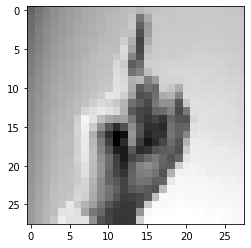

In [98]:
pic1 = np.reshape(X_train[0], (28, 28))
plt.imshow(pic1, cmap = "gray")
print("Letter: ", letters[y_train[0].item()])

As expected, the letter in the hand image is D. However, it is evident that the image is not clear due to its small resolution. This may affect the accuracy of our model and the implementation of the model in a much larger scale.

The training and testing input arrays are converted to continuous float values since it allows our model for a more precise learning as compared to discrete values. On the other hand, the training and testing labels are converted to long integers since the output of the model are indices to be used in accessing probability values.

## Q8. Implement `SimpleLogisticRegression` class. (25 points)

You are free to search on the internet about implementing a Logistic Regression model using `sklearn.linear_model.LogisticRegression`.

In [100]:
from sklearn.linear_model import LogisticRegression

############# Your code here ############
log_reg = LogisticRegression().fit(X_train, y_train)
score = log_reg.score(X_test, y_test)
print(f'LogisticRegression R2 score = {score}')
#########################################

LogisticRegression R2 score = 0.6600669269380925


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q9. Multi-label classification metrics. (10 points)

Search on the web and find **two** best metrics for multi-label classification. Write about how it works and why we use them. Then, implement it using `sklearn.metrics`

In [101]:
############# Your code here ############
#metric 1: multi label confusion matrix
from sklearn.metrics import multilabel_confusion_matrix, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
def compute_confusion_matrix(y_true, y_pred):
  mlb = MultiLabelBinarizer()
  binary_y_true = mlb.fit_transform(y_true)
  binary_y_pred = mlb.transform(y_pred)
  return multilabel_confusion_matrix(binary_y_true, binary_y_pred)
#metric 2: f1-score
def compute_f1_score(y_true, y_pred):
  mlb = MultiLabelBinarizer()
  binary_y_true = mlb.fit_transform(y_true)
  binary_y_pred = mlb.transform(y_pred)
  return f1_score(binary_y_true, binary_y_pred, average='weighted')
#########################################

In [102]:
y_true = [(12, 2, 4, 5),(5, 2),(12,)]
y_pred = [(4, 5),(5, 2),(5, 4)]
conf_mat = compute_confusion_matrix(y_true, y_pred)
f1score = compute_f1_score(y_true, y_pred)
print(f'f1-score = {f1score}')
print(f'confusion matrix =\n{conf_mat}')

f1-score = 0.5142857142857143
confusion matrix =
[[[1 0]
  [1 1]]

 [[1 1]
  [0 1]]

 [[0 1]
  [0 2]]

 [[1 0]
  [2 0]]]


# 3. Submission

Please read the notes here carefully:

1. The more beautiful and insightfull your plots and diagrams are, the more points you get. So please take your time and concentration to prepare a good report with nice diagrams.

2. The file you upload must be named as `[Student ID]-[Your name].zip` and it must contain **only 1 file**:

  - `Linear_and_Logistic_Regression.ipynb`
  
4. **Important Note**: The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that 


  
In case you have any questions, contact **mohammad99hashemi@gmail.com**.